# **ALL IMPORTS**



In [ ]:
import nltk
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
import inflect as info
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk import pos_tag
import matplotlib.pyplot as plt
##nltk.download()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **DATA PREPROCESSING**

In [ ]:
def Remove_punctation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def Remove_WhiteSpace(text):
    return " ".join(text.split())

def Convert_num(text):
    converter=info.engine()
    temp_text=text.split()
    new_text=[]
    for word in temp_text :
        if word.isdigit():
            temp=converter.number_to_words(word)
            new_text.append(temp)
        else:
            new_text.append(word)
    temp_text=" ".join(new_text)
    return temp_text

def RemoveSpecialChar(text):
    text=re.sub('a-zA-z',' ',text)
    return text

def Remove_stopWords(text):
    English_StopWords=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    new_text=[word for word in word_tokens if word not in English_StopWords]
    return new_text

def SpellChecker(text):
    correctWords=[]
    for word in text:
        correctWord=TextBlob(word).correct()
        correctWords.append(correctWord)
    return correctWords

def Stemming(text):
    stemmer=PorterStemmer()
    stem_words=[stemmer.stem(word) for word in text ]
    return stem_words

def Lemmatization(text):
    lemmatizer=WordNetLemmatizer()
    lemm_words=[lemmatizer.lemmatize(word,pos='v') for word in text]
    return lemm_words

def listToString(text):
    return ' '.join(text)

def POS_Tagging(text):
    return pos_tag(text)

df=pd.read_csv("data_spam.csv",encoding='latin-1')
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True) ##lw mash hatshtghl b collab shel el satr dah
##check for nulls
print(df.isnull().sum())
##Lower case
df['clean_data']=df['v2'].str.lower()
##Remove whiteSpace
df['clean_data'] = df['clean_data'].apply(lambda raw: Remove_WhiteSpace(raw))
##Convert number to words
df['clean_data'] = df['clean_data'].apply(lambda raw:Convert_num(raw))
##Remove punctation
df['clean_data'] = df['clean_data'].apply(lambda raw: Remove_punctation(raw))
##Remove special character
df['clean_data']=df['clean_data'].apply(lambda raw:RemoveSpecialChar(raw))
##Remove_stopWords
df['clean_data'] = df['clean_data'].apply(lambda raw:Remove_stopWords(raw))
##Stemming
df['clean_data']=df['clean_data'].apply(lambda raw:Stemming(raw))
##Lemmatization
df['clean_data']=df['clean_data'].apply(lambda raw:Lemmatization(raw))
## Convert list to string
df['clean_data'] = df['clean_data'].apply(lambda x: listToString(x))
df=df.drop(columns=['v2'])## drop un_cleaned data
print('Number of duplictaed rows=',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Number of duplictaed rows after cleaning=',df.duplicated().sum())
df

v1    0
v2    0
dtype: int64
Number of duplictaed rows= 458
Number of duplictaed rows after cleaning= 0


,v1,clean_data
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri two wkli comp win fa cup final tkt ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
...,...,...
5567,spam,2nd time tri two contact u u å£750 pound prize...
5568,ham,ì b go esplanad fr home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like id interest buy someth els ...


# **Visualization**

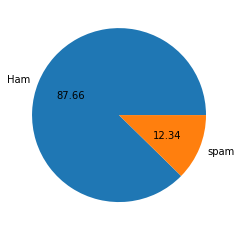

In [ ]:
plt.pie(df['v1'].value_counts(),labels=['Ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
##After drop unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5114 non-null   object
 1   clean_data  5114 non-null   object
dtypes: object(2)
memory usage: 119.9+ KB


In [ ]:
# Generate BoW features
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['clean_data']).toarray()
X_bow


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Generate TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['clean_data']).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### ***MODELS USING BOW FEATURE***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bow,df['v1'], test_size=0.2, random_state=42)
# Split the data into training and testing sets
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier()
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred, pos_label='spam')*100
    prec = precision_score(y_test, y_pred, pos_label='spam')*100
    rec = recall_score(y_test, y_pred, pos_label='spam')*100
    print(f'{name} Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}')

Logistic Regression Accuracy: 98.2405, Precision: 99.1379, Recall: 87.1212, F1-score: 92.7419
Multinomial Naive Bayes Accuracy: 98.1427, Precision: 91.2409, Recall: 94.6970, F1-score: 92.9368
Support Vector Machine Accuracy: 98.1427, Precision: 99.1304, Recall: 86.3636, F1-score: 92.3077
Random Forest Accuracy: 98.0450, Precision: 98.2759, Recall: 86.3636, F1-score: 91.9355
KNeighborsClassifier Accuracy: 92.8641, Precision: 100.0000, Recall: 44.6970, F1-score: 61.7801


### ***MODELS USING TF-IDF FEATURE***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,df['v1'], test_size=0.2, random_state=42)
# Split the data into training and testing sets
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': svm.SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier()
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred, pos_label='spam')*100
    prec = precision_score(y_test, y_pred, pos_label='spam')*100
    rec = recall_score(y_test, y_pred, pos_label='spam')*100
    print(f'{name} Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}')

Logistic Regression Accuracy: 96.4809, Precision: 100.0000, Recall: 72.7273, F1-score: 84.2105
Multinomial Naive Bayes Accuracy: 97.9472, Precision: 99.1150, Recall: 84.8485, F1-score: 91.4286
Support Vector Machine Accuracy: 97.8495, Precision: 100.0000, Recall: 83.3333, F1-score: 90.9091
Random Forest Accuracy: 98.3382, Precision: 99.1453, Recall: 87.8788, F1-score: 93.1727
KNeighborsClassifier Accuracy: 91.1046, Precision: 100.0000, Recall: 31.0606, F1-score: 47.3988
